We will perform **Market Basket Analysis** for retail dataset.

The business objective of market basket analysis is to boost up customer transaction by adding other items so it would increase the spending amount.
> "Usually if people buy product A, they will also buy product B"

For instance, people that buy burger often also buy cola or french fries. With that idea behind, we will seek what items that usually bought together in this retail dataset. So we can build some strategies to get more spending for each customer.


Market Basket Analysis could perform using association rules.

> "Association Rule Mining is a rule-based machine learning method that helps to uncover meaningful correlations between different products according to their co-occurrence in a data set"

Three metrics that need to measures in Association Rules are describe as follows:
1. Support
* To show how popular an item is. 
* Measured by the proportion of transactions in which an itemset appears
* Support(item A) is the number of transactions which includes A divided by the total number of transactions
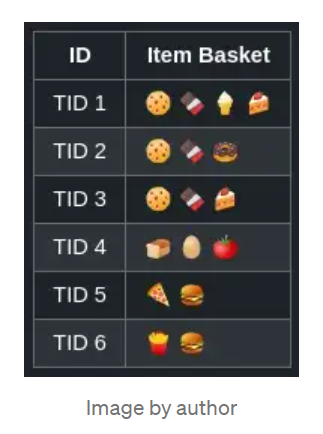
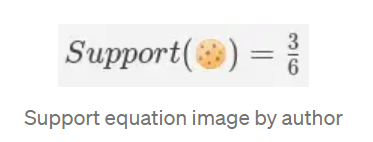
* It means out of a total of 6 transactions, purchases containing cookies have occurred 3 times. or 50%.

2. Confidence
* Used to describe the probability of an item being purchased when another item is already in the basket. How likely item Y is purchased when item X purchased
* It is measured by dividing the proportion of transactions with item X and Y, over the proportion of transactions with Y.
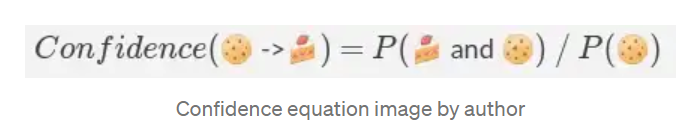
* The P(item) is support(item). 
* So, it would be Confidence(Cookies->Cake) = Support(Cookies,Cake)/Support(Cookies)
* One drawback of the confidence measure is that it might misrepresent the importance of an association. This is because it only accounts for how popular cookies are, but not cake. If cake are also very popular in general, there will be a higher chance that a transaction containing cookies will also contain cake, thus inflating the confidence measure.

3. Lift
* To tackle the drawback above, we can use lift. Lift measures how likely an item is purchased when another item is purchased, while **controlling for how popular both items are**
* Calculated by dividing the probability of both of the items occurring together by the product of the probabilities of the both individuals items occurring as if there was no association between them
*  A lift value greater than 1 means that item Y is likely to be bought if item X is bought, while a value less than 1 means that item Y is unlikely to be bought if item X is bought.
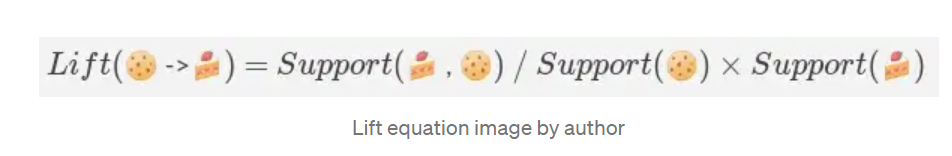

Source: 
* https://towardsdatascience.com/data-mining-market-basket-analysis-with-apriori-algorithm-970ff256a92c
* https://www.kdnuggets.com/2016/04/association-rules-apriori-algorithm-tutorial.html

So in this dataset we will utilize all of that metrics will requirement as belows
1. Minimum support 0.01. It means the item in 100 transaction at least the item is purchased 1 times.
2. Sort by the highest confidence, to see the popular associaton between items that people purchased
3. Lift > 1 that means item Y is likely to be bought if item X is bought

We're using online retail data from kaggle, you can download the data [here](https://www.kaggle.com/datasets/mashlyn/online-retail-ii-uci/code)

* InvoiceNo: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.
* StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.
* Description: Product (item) name. Nominal.
* Quantity: The quantities of each product (item) per transaction. Numeric.
* InvoiceDate: Invice date and time. Numeric. The day and time when a transaction was generated.
* UnitPrice: Unit price. Numeric. Product price per unit in sterling (Â£).
* CustomerID: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.
Country: Country name. Nominal. The name of the country where a customer resides.

In [1]:
#import library for preprocessing
import pandas as pd
import numpy as np 
import re

#import library for association rules
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
dataset = pd.read_csv('/content/gdrive/MyDrive/online_retail_II.csv')
dataset

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [4]:
dataset = dataset.sort_values('Invoice')
dataset

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1065910,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
1067002,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
1067176,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
1067178,C581569,20979,36 PENCILS TUBE RED RETROSPOT,-5,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


# Quick EDA

In [5]:
nan_cust = dataset[dataset['Customer ID'].isna()]
print(nan_cust.agg({'Invoice':'nunique', 'StockCode':'nunique'}))
nan_cust

Invoice      8752
StockCode    5177
dtype: int64


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
1017662,C578097,84029E,RED WOOLLY HOTTIE WHITE HEART.,-48,2011-11-22 17:31:00,3.75,NaN,United Kingdom
1040445,C579757,47469,ASSORTED SHAPES PHOTO CLIP SILVER,-24,2011-11-30 14:56:00,0.65,NaN,United Kingdom
1041915,C579907,22169,FAMILY ALBUM WHITE PICTURE FRAME,-2,2011-12-01 08:48:00,7.65,NaN,EIRE
1050062,C580604,AMAZONFEE,AMAZON FEE,-1,2011-12-05 11:35:00,11586.50,NaN,United Kingdom


Shows that there are 8752 unique invoice that have no customer, with 5177 product/ Stock Code purchased.

This data indicate some invalidity due to the context of online retail that need to login to purchased. So they might have some problem to record the data. We can exclude for this case, because we want to build the market basket from the valid transaction only.

In [6]:
minus_transaction = dataset[dataset['Quantity']<1]
print(minus_transaction.agg({'Invoice':'nunique', 'StockCode':'nunique'}))
minus_transaction

Invoice      11684
StockCode     4089
dtype: int64


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
3114,489655,20683,NaN,-44,2009-12-01 17:26:00,0.00,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
1065910,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
1067002,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
1067176,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
1067178,C581569,20979,36 PENCILS TUBE RED RETROSPOT,-5,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


Shows that there are 11684 unique invoice that have quantity>0 or minus quantity, with 4089 product/Stock Code purchased.

This data indicate some invalidity due to the context of quantity for a item to purchased is minimum 1. 
We can exclude for this case, because we want to build the market basket from the valid transaction only.

In [7]:
country = dataset.groupby('Country').agg({'Invoice':'nunique'}).sort_values('Invoice', ascending=False).reset_index()
country['Percentage'] = (country['Invoice'] / country['Invoice'].sum())*100
country.head(5)

,Country,Invoice,Percentage
0,United Kingdom,49108,91.571567
1,Germany,1095,2.041844
2,EIRE,806,1.502946
3,France,746,1.391064
4,Netherlands,250,0.466174


Shows that United Kingdom held majority of the transaction, 91.5% transaction is from UK
UK data is sufficient for us to do this analysis, we're not processing too much transaction. It is also to align with other analysis (price elasticity analysis [link here](https://github.com/evaagustine/price-elasticity-retail-data/blob/main/Price_Elasticity_Practical.ipynb)) that use only UK data.

#Preprocessing (Data Cleaning)

In [8]:
# Delete transaction with nan customer
dataset = dataset[dataset['Customer ID'].notna()]
# Delete items with quantity<1
dataset = dataset[dataset['Quantity']>1]
# Cut the data to focus on United Kingdom
dataset = dataset[dataset['Country']=='United Kingdom']

dataset

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067330,581585,22481,BLACK TEA TOWEL CLASSIC DESIGN,12,2011-12-09 12:31:00,0.39,15804.0,United Kingdom
1067352,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom
1067353,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom
1067354,581586,20685,DOORMAT RED RETROSPOT,10,2011-12-09 12:49:00,7.08,13113.0,United Kingdom


In [9]:
# Change data type
dataset['InvoiceDate'] = pd.to_datetime(dataset['InvoiceDate']).dt.date
# Add monthyear to cut off the data only in December 2009 (to align with price elasticity analysis)
dataset["monthyear"] = pd.to_datetime(dataset["InvoiceDate"]).dt.to_period('M').dt.to_timestamp()
dataset = dataset[dataset.monthyear=="2009-12-01"]

# Preprocessing (Market Basket Analysis)

In [10]:
#Choose only column needed to do association rules
basket_item = dataset[['Invoice','Description']]
# Delete duplicate of data in one transactions
basket_item = basket_item.drop_duplicates()
basket_item['value'] = 1
basket_item

,Invoice,Description,value
0,489434,15CM CHRISTMAS GLASS BALL 20 LIGHTS,1
1,489434,PINK CHERRY LIGHTS,1
2,489434,WHITE CHERRY LIGHTS,1
3,489434,"RECORD FRAME 7"" SINGLE SIZE",1
4,489434,STRAWBERRY CERAMIC TRINKET BOX,1
...,...,...,...
45071,493399,WOODEN PICTURE FRAME WHITE FINISH,1
45070,493399,WOODEN FRAME ANTIQUE WHITE,1
45074,493399,SCOTTIE DOG HOT WATER BOTTLE,1
45222,493407,REX CASH+CARRY JUMBO SHOPPER,1


In [11]:
basket_item = basket_item.pivot_table('value', 'Invoice','Description')
basket_item = basket_item.replace(np.nan, 0)
basket_item

Description,3 STRIPEY MICE FELTCRAFT,ANIMAL STICKERS,BLACK PIRATE TREASURE CHEST,BROWN PIRATE TREASURE CHEST,CAMPHOR WOOD PORTOBELLO MUSHROOM,CHERRY BLOSSOM DECORATIVE FLASK,FAIRY CAKE CANDLES,FLAMINGO LIGHTS,HOME SWEET HOME BLACKBOARD,IVORY PAPER CUP CAKE CASES,...,ZINC HEART LATTICE 2 WALL PLANTER,ZINC HEART LATTICE CHARGER LARGE,ZINC HEART LATTICE CHARGER SMALL,ZINC HEART LATTICE DOUBLE PLANTER,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC HEART LATTICE TRAY OVAL,ZINC METAL HEART DECORATION,ZINC POLICE BOX LANTERN,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK
Invoice,,,,,,,,,,,,,,,,,,,,,
489434,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489436,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489437,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
493398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
493399,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#Apriori and Association Rules

In [12]:
frequent_itemsets = apriori(basket_item, min_support= 0.01, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.022222,( 3 STRIPEY MICE FELTCRAFT)
1,0.010753,( FLAMINGO LIGHTS)
2,0.017204,( PEACE WOODEN BLOCK LETTERS)
3,0.016487,( RED/WHITE DOT MINI CASES)
4,0.014337,( SILVER CHERRY LIGHTS)
...,...,...
15290,0.010036,"(WOOD 2 DRAWER CABINET WHITE FINISH, PINK CHER..."
15291,0.010036,"(WOOD 2 DRAWER CABINET WHITE FINISH, PINK CHER..."
15292,0.010036,"(WOOD 2 DRAWER CABINET WHITE FINISH, PINK CHER..."
15293,0.010036,"(WOOD 2 DRAWER CABINET WHITE FINISH, PINK CHER..."


max support:  0.1813620071684588
median support:  0.01003584229390681


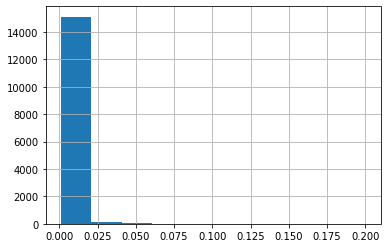

In [15]:
print("max support: ", frequent_itemsets['support'].max())
print("median support: ", frequent_itemsets['support'].median())
frequent_itemsets['support'].hist(range=[0.001, 0.2])

In [14]:
#Set requirement of lift>1
rules = association_rules(frequent_itemsets, metric="lift",  min_threshold = 1)
#Choose 100 most popular items that likely to purchased together
rules.sort_values('confidence', ascending=False).head(100)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1346548,"(EDWARDIAN PARASOL NATURAL, PINK CHERRY LIGHTS...","(BLACK/BLUE DOTS RUFFLED UMBRELLA, WHITE HANGI...",0.010036,0.010036,0.010036,1.0,99.642857,0.009935,inf
1613771,"(PINK CHERRY LIGHTS, WOOD S/3 CABINET ANT WHIT...","(POTTING SHED COFFEE MUG, WOOD 2 DRAWER CABINE...",0.010036,0.010036,0.010036,1.0,99.642857,0.009935,inf
1613784,"(WOOD S/3 CABINET ANT WHITE FINISH, RED HANGIN...","(EDWARDIAN PARASOL RED, WOOD 2 DRAWER CABINET ...",0.010036,0.011470,0.010036,1.0,87.187500,0.009921,inf
1613783,"(WOOD S/3 CABINET ANT WHITE FINISH, EDWARDIAN ...","(RED HANGING HEART T-LIGHT HOLDER, WOOD 2 DRAW...",0.010036,0.011470,0.010036,1.0,87.187500,0.009921,inf
1613782,"(WOOD S/3 CABINET ANT WHITE FINISH, EDWARDIAN ...","(UNION JACK GUNS & ROSES DOORMAT, WOOD 2 DRAW...",0.010036,0.011470,0.010036,1.0,87.187500,0.009921,inf
...,...,...,...,...,...,...,...,...,...
1613719,"(WOOD 2 DRAWER CABINET WHITE FINISH, PINK CHER...","(EDWARDIAN PARASOL RED, POTTING SHED COFFEE MU...",0.010036,0.010036,0.010036,1.0,99.642857,0.009935,inf
1613752,"(WOOD 2 DRAWER CABINET WHITE FINISH, WOOD S/3 ...","(EDWARDIAN PARASOL RED, POTTING SHED COFFEE MU...",0.010036,0.010036,0.010036,1.0,99.642857,0.009935,inf
1613737,"(WOOD 2 DRAWER CABINET WHITE FINISH, PINK CHER...","(EDWARDIAN PARASOL RED, POTTING SHED COFFEE MU...",0.010036,0.010036,0.010036,1.0,99.642857,0.009935,inf
1613751,"(WOOD 2 DRAWER CABINET WHITE FINISH, WOOD S/3 ...","(RED HANGING HEART T-LIGHT HOLDER, POTTING SHE...",0.010036,0.010036,0.010036,1.0,99.642857,0.009935,inf


#Result

Here is one of the most popular items to buy together

In [19]:
rules.loc[1346548]['antecedents']

frozenset({'EDWARDIAN PARASOL NATURAL',
           'PINK CHERRY LIGHTS',
           'RED HANGING HEART T-LIGHT HOLDER',
           'WOOD S/3 CABINET ANT WHITE FINISH',
           'WOODEN PICTURE FRAME WHITE FINISH'})

In [20]:
rules.loc[1346548]['consequents']

frozenset({' WHITE CHERRY LIGHTS',
           'BLACK/BLUE DOTS RUFFLED UMBRELLA',
           'FANCY FONT HOME SWEET HOME DOORMAT',
           'WHITE HANGING HEART T-LIGHT HOLDER'})

Some insight that we could take:
* People who purchased lights often buy two color together, the most popular is pink cherry and white
* People who purchased umbrella with the type of edwardian parasol natural also bought black/blue dots ruffled umbrella
* People who want to decor their home actually buy some product including cabinet, t-light, cabinet, doormat and picture frame. 
* Another interesting insight is they also bought them with matching color such as all white in this case